# Lecture 9
## Tuesday, October 2nd, 2018
### Automatic Differentiation:  The Basics

#### References
* [A Hitchhiker’s Guide to Automatic Differentiation](https://link.springer.com/article/10.1007/s11075-015-0067-6)
* Griewank, A. and Walther, A., 2008. Evaluating derivatives: principles and techniques of algorithmic differentiation (Vol. 105). Siam.

In [1]:
# Load libraries that we'll need
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# or inline

---

# Introduction and Motivation

Differentiation is one of the most important operations in science.  Finding extrema of functions and determining zeros of functions are central to optimization.  Numerically solving differential equations forms a cornerstone of modern science and engineering and is intimately linked with predictive science.

A very frequent occurrence in science requires the scientist to find the zeros of a function $f\left(x\right)$.  The input to the function is a $m-$ dimensional vector and the function returns an $n-$ dimensional vector.  We denote this mathematically as $f\left(x\right): \mathbb{R}^{m} \mapsto \mathbb{R}^{n}$.  This expression is read:  the function $f\left(x\right)$ maps $\mathbb{R}^{m}$ to $\mathbb{R}^{n}$.

### Example 1
The system of nonlinear equations
\begin{align}
  x_{1}x_{2}^{3} + \ln\left(x_{3}^{2}\right) = \sin\left(x_{1}x_{2}x_{3}\right) \\
  x_{1} + x_{2} + \tan\left(x_{3}\right) = \frac{1}{x_{1}x_{2}x_{3}}
\end{align}
has
\begin{align}
 x = 
 \begin{bmatrix}
   x_{1} \\
   x_{2} \\
   x_{3}
 \end{bmatrix}
\end{align}
and we say $x\in\mathbb{R}^{3}$.  Thus, following the notation above, we say $m = 3$.  The function of interest is 
\begin{align}
  \displaystyle
  f\left(x\right) = 
  \begin{bmatrix}
    \displaystyle x_{1}x_{2}^{3} + \ln\left(x_{3}^{2}\right) - \sin\left(x_{1}x_{2}x_{3}\right) \\
    \displaystyle x_{1} + x_{2} + \tan\left(x_{3}\right) - \dfrac{1}{x_{1}x_{2}x_{3}}
  \end{bmatrix}
  .
\end{align}
Thus $f\left(x\right)$ maps $\mathbb{R}^{3}$ to $\mathbb{R}^{2}$ and we write $f\left(x\right): \mathbb{R}^{3} \mapsto \mathbb{R}^{2}$.

We may have cause to find an $x$ that renders $f\left(x\right)=0$.  This is not so difficult for a linear system, but for a nonlinear system it can be a major challenge.  Newton's method is an algorithm with excellent convergence properties that allows us to find the roots of a nonlinear function.

#### Derivation of Newton's Method
We want to find $x\in\mathbb{R}^{m}$ such that $f\left(x\right) = 0$ for  $f\left(x\right) \in \mathbb{R}^{n}$.  Here are the basic steps:
1. Start with an initial guess $x_{k}$.  It is very likely that $f\left(x_{k}\right) \neq 0$.
2. Look at a point just a little beyond $x_{k}$.  That is $x_{k+1} = x_{k} + \Delta x_{k}$ where $\Delta x_{k} = x_{k+1} - x_{k}$.
3. Since $\Delta x_{k}$ is "small", and we are still in the local neighborhood of $x_{k}$, we ought to expand $f\left(x\right)$ about $x_{k}$ in a Taylor series. $$f\left(x_{k} + \Delta x_{k}\right) = f\left(x_{k}\right) + \displaystyle\left.\dfrac{\partial f}{\partial x}\right|_{x = x_{k}} \Delta x_{k} + \cdots.$$
4. Working with higher-order terms can be messy, so we'll just keep the linear terms and write $$f\left(x_{k} + \Delta x_{k}\right) \approx f\left(x_{k}\right) + \displaystyle\left.\dfrac{\partial f}{\partial x}\right|_{x = x_{k}} \Delta x_{k}.$$
5. We want $f\left(x_{k+1}\right) = 0$.  So we write $$f\left(x_{k}\right) + \displaystyle\left.\dfrac{\partial f}{\partial x}\right|_{x = x_{k}} \Delta x_{k} = 0.$$  It is understood that this relationship is approximate and that we're looking for an approximate correction $\Delta x_{k}$ that will give $f\left(x_{k+1}\right) = 0$.
6. We write a linear system at iteration $k$ for $\Delta x_{k}$.  $$\displaystyle\left.\dfrac{\partial f}{\partial x}\right|_{x = x_{k}} \Delta x_{k} = -f\left(x_{k}\right).$$  In linear algebra terms we write $$J \Delta x_{k} = -f\left(x_{k}\right)$$ where $$J = \displaystyle\left.\dfrac{\partial f}{\partial x}\right|_{x = x_{k}}$$ is called the Jacobian.
7. The new guess for the root is $x_{k+1} = x_{k} + \Delta x_{k}$.  This process is repeated until $f\left(x_{k+1}\right) \approx 0$ to within some acceptable tolerance.  

**Note:** There are many ways of implementing Newton's method with varying sophistication.  We won't cover those ideas at the moment.

At the heart of Newton's method lies the Jacobian, which is a matrix of partial derivatives.  Accurate calculation of the Jacobian is key to realizing the good convergence properties of Newton's method.

### Example 2
We want to find where the functions $y_{1} = x$ and $y_{2} = \exp\left(-2\sin^{2}\left(4x\right)\right)$ intersect.  That is, for what values of $x$ is $y_{1} = y_{2}$?  This question is equivalent to the problem of finding the zeros of $$f\left(x\right) = x - \exp\left(-2\sin^{2}\left(4x\right)\right).$$

Before doing anything, it's a good idea to visualize what we're up against.

<IPython.core.display.Javascript object>


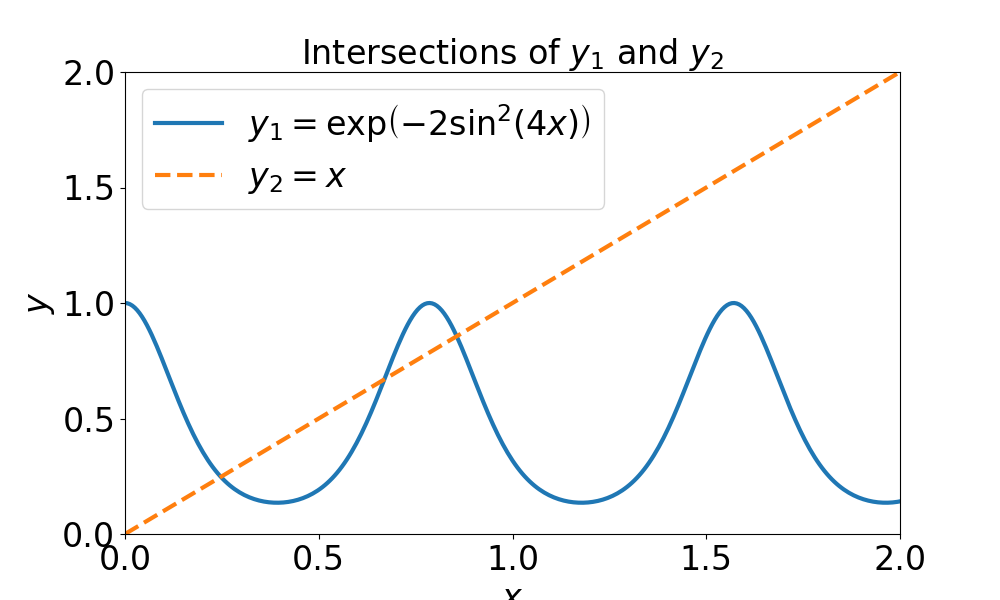

In [2]:
# Define function
x = np.linspace(0.0, 2.0*np.pi, 1000)
y = np.exp(-2.0 * np.sin(4.0*x)*np.sin(4.0*x))

# Plot the two functions to see where they intersect
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, y, lw=3, label=r'$y_{1} = \exp\left(-2\sin^{2}\left(4x\right)\right)$')
ax.plot(x, x, ls='--', lw=3, label=r'$y_{2} = x$')

ax.set_xlim(0, 2.0)
ax.set_ylim(0, 2.0)

ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$y$', fontsize=24)
ax.set_title(r'Intersections of $y_{1}$ and $y_{2}$', fontsize=24)
ax.tick_params(labelsize=24)

ax.legend(fontsize=24)

<IPython.core.display.Javascript object>


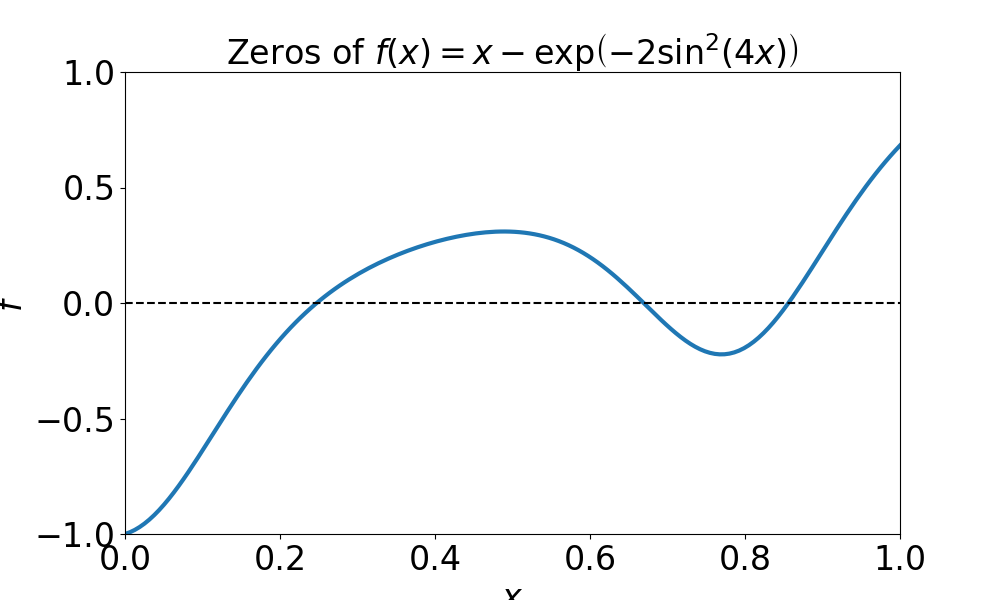

In [3]:
# Plot f(x) = x - y to see where the zeros are
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(x, x-y, lw=3, label=r'$x-\exp\left(-2\sin^{2}\left(4x\right)\right)$')
ax.axhline(0, color='k', ls='--')

ax.set_xlim(0, 1.0)
ax.set_ylim(-1.0, 1.0)

ax.set_xlabel(r'$x$', fontsize=24)
ax.set_ylabel(r'$f$', fontsize=24)
ax.set_title(r'Zeros of $f\left(x\right) = x-\exp\left(-2\sin^{2}\left(4x\right)\right)$', fontsize=24)
ax.tick_params(labelsize=24)

It's pretty messy.  There are three zeros and we can't solve this monster by hand.  Let's try Newton's method.  Like any good developer, we begin by sketching out our implementation.

```python
xk # Set initial guess
tol # Set tolerance
max_it # Maximum iterations
for k in range(max_it):
    delta_xk = -f(xk) / dfdx(xk) # Evaluate Delta x
    if (delta_xk <= tol): # Stop iteration if solution
        root = xk + delta_xk
        break
    xk += delta_xk # Update xk
```

Looks good.  Let's start implementing.  Clearly we need functions for evaluating $f\left(x\right)$ and the Jacobian.  Note that the symbolic derivative of $f\left(x\right)$ is $$\dfrac{df}{dx} = 1 + 16\exp\left(-2\sin^{2}\left(4x\right)\right)\sin\left(4x\right)\cos\left(4x\right).$$

In [4]:
def f(x):
    # Hard-coded f(x)
    return x - np.exp(-2.0 * np.sin(4.0*x) * np.sin(4.0*x))

def dfdx(x):
    # Hard-coded Jacobian of f(x)
    return 1.0 + 16.0 * np.exp(-2.0 * np.sin(4.0*x) * np.sin(4.0*x)) * np.sin(4.0*x) * np.cos(4.0*x)

# Start Newton algorithm
xk = 0.1 # Initial guess
tol = 1.0e-08 # Some tolerance
max_it = 100 # Just stop if a root isn't found after 100 iterations

root = None # Initialize root
for k in range(max_it):
    delta_xk = -f(xk) / dfdx(xk) # Update Delta x_{k}
    if (abs(delta_xk) <= tol): # Stop iteration if solution found
        root = xk + delta_xk
        print("Found root at x = {0:17.16f} after {1} iteratons.".format(root, k+1))
        break
    print("At iteration {0}, Delta x = {1:17.16f}".format(k+1, delta_xk))
    xk += delta_xk # Update xk

At iteration 1, Delta x = 0.1218876773122230
At iteration 2, Delta x = 0.0233959919379915
At iteration 3, Delta x = 0.0020665479886371
At iteration 4, Delta x = 0.0000150007973689
Found root at x = 0.2473652188201050 after 5 iteratons.


It appears to be working okay.  Let's check to see what the function's value is at our supposed root.

In [5]:
print(root)
f(root)

0.247365218820105


5.551115123125783e-17

Alright, I'm convinced.

(However, if you play with this implementation a bit you'll see some strange behavior.  We can discuss offline if you're curious.)

**Warning!** This little sketch is not the optimal way of implementing Newton's method.  It just gives you the basic ideas!

### Summary
Derivatives are everywhere in science and engineering.  We illustrated a situation from optimization where we try to find the roots of a comlicated, high-dimensional nonlinear function.  The algorithm that we used was Newton's method, which requires evaluations of the Jacobian.  

We did a nice little example to find the roots of a nonlinear function in one dimension.  We hard-coded the function and it's derivative.  What if we can't easily compute the derivative by hand?  Or what if we're just lazy, and we don't *want* to compute the derivative by hand?

## The Finite Difference
Suppose we want to avoid relying on the symbolic computation of the derivative.  An obvious and very convenient way to do so is to use a finite difference.  For a single-variable function, we just write $$\dfrac{\partial f}{\partial x} \approx \dfrac{f\left(x+\epsilon\right) - f\left(x\right)}{\epsilon}$$ for some "small" $\epsilon$.  Let's do a little demo to see how things turn out.

We'll compute the derivative of $$f\left(x\right) = x - \exp\left(-2\sin^{2}\left(4x\right)\right).$$  We've already defined `python` functions for $f\left(x\right)$ and its derivative.  Let's define a function for the first order finite difference.

In [6]:
def dfdx_h(x, epsilon):
    return (f(x + epsilon) - f(x)) / epsilon

<IPython.core.display.Javascript object>


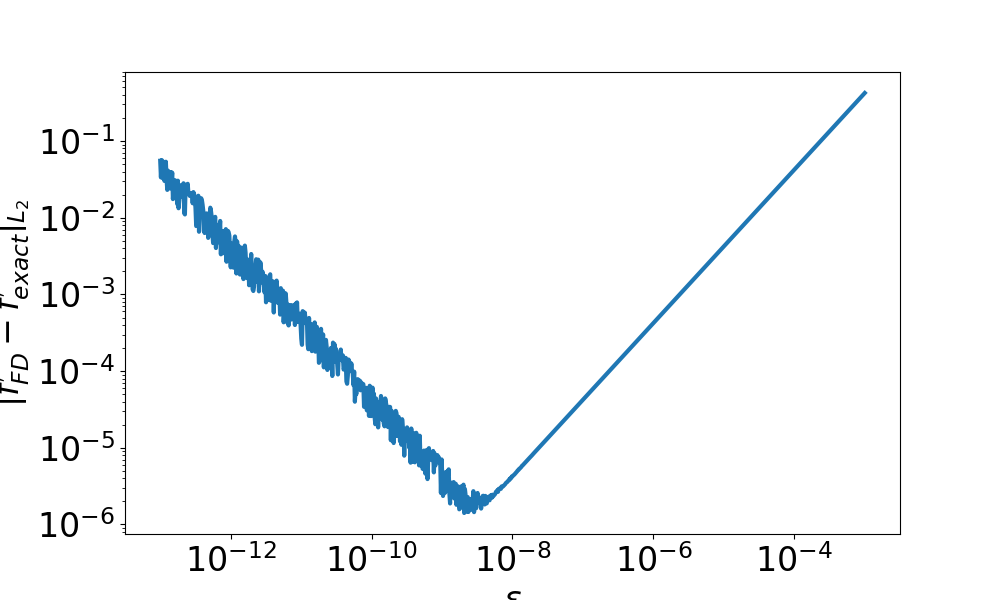

The minimum error of 1.4120491572905597e-06 was obtained at epsilon = 2.0621218039991445e-09.


In [7]:
x = np.linspace(0.0, 2.0, 1000) # Define domain
eps = np.logspace(-13, -3, 1000) # Define \epsilon domain

err = np.zeros(len(eps))
# Loop over epsilons
for idx, e in enumerate(eps):
    df_err = dfdx_h(x,e) - dfdx(x) # Compute error between FD and analytical at each point
    err[idx] = np.linalg.norm(df_err) # Store error as L2 norm

# Make a log-log plot of the error
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(eps, err, lw=3)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\epsilon$', fontsize=24)
ax.set_ylabel(r'$\| f^{\prime}_{FD} - f^{\prime}_{exact}\|_{L_{2}}$', fontsize=24)
ax.tick_params(labelsize=24)

# Print out minimum error
print(r"The minimum error of {0:17.16e} was obtained at epsilon = {1:17.16e}.".format(err.min(), eps[err==err.min()][0]))

Very interesting!  First of all, the smallest error we could get was around $10^{-6}$ which is several orders of magnitude above machine precision.  Secondly, the minimum error was not obtained at $\epsilon = $ machine precision.  The observation is that $\epsilon$ too small starts to amplify floating point errors while $\epsilon$ too large doesn't provide a good approximation to the derivative.

In fact, it's not clear how to choose $\epsilon$ in general.  There are some results from numerical analysis and they indicate that $\epsilon$ should be around $\sqrt{\epsilon_{\text{machine}}}$ as a rule of thumb for a first-order method.

#### A few more notes on finite difference approaches
* We could get a higher-order approximation by using the second-order finite difference formula $$\dfrac{\partial f}{\partial x} \approx \dfrac{f\left(x+\epsilon\right) - f\left(x - \epsilon\right)}{2\epsilon}.$$  This formula suffers from the same difficulties as the first-order approximation.
* To calculate the derivative of a multivariate function we can write $$\dfrac{\partial f}{\partial x_{j}} \approx \dfrac{f\left(x+\epsilon e_{j}\right) - f\left(x\right)}{\epsilon}$$ where $e_{j}$ is the unit vector in the direction of $x_{j}$.

# Automatic Differentiation: The Mechanics and Basic Ideas
In the introduction, we motivated the need for computational techniques to compute derivatives.  The focus in the introduction was on the finite difference method, but we also computed a symbolic derivative.  The finite difference approach is nice because it is quick and easy.  However, it suffers from accuracy and stability problems.  On the other hand, symbolic derivatives can be evaluated to machine precision, but can be costly to evaluate.  We'll have more to say about cost of symbolic differentiation later.

Automatic differentiation (AD) overcomes both of these deficiencies.  It is less costly than symbolic differentiation while evaluating derivatives to machine precision.  There are two modes of automatic differentiation: forward and reverse.  This course will be primarily concerned with the forward mode.  Time-permitting, we will give an introduction to the reverse mode.  In fact, the famous backpropagation algorithm from machine learn is a special case of the reverse mode of automatic differentiation.

## Review of the Chain Rule

At the heart of AD is the famous *chain rule* from calculus.

### Back to the Beginning
Suppose we have a function $h\left(u\left(t\right)\right)$ and we want the derivative of $h$ with respect to $t$.  The derivative is $$\dfrac{\partial h}{\partial t} = \dfrac{\partial h}{\partial u}\dfrac{\partial u}{\partial t}.$$  This is the rule that we used in symbolically computing the derivative of the function $f\left(x\right) = x - \exp\left(-2\sin^{2}\left(4x\right)\right)$ earlier.

### Adding an Argument
Now suppose $h$ has another argument so that we have $h\left(u\left(t\right),v\left(t\right)\right)$.  Once again, we want the derivative of $h$ with respect to $t$.  Applying the chain rule in this case gives
\begin{align}
  \displaystyle 
  \frac{\partial h}{\partial t} = \frac{\partial h}{\partial u}\frac{\partial u}{\partial t} + \frac{\partial h}{\partial v}\frac{\partial v}{\partial t}.
\end{align}

### The Gradient
What if we replace $t$ by a vector $x\in\mathbb{R}^{m}$?  Now we want the gradient of $h$ with respect to $x$.  We write $h = h\left(u\left(x\right),v\left(x\right)\right)$ and the derivative is now 
\begin{align}
  \nabla_{x} h = \frac{\partial h}{\partial u}\nabla u + \frac{\partial h}{\partial v} \nabla v
\end{align}
where we have written $\nabla_{x}$ on the left hand side to avoid any confusion with arguments.  The gradient operator on the right hand side is clearly with respect to $x$ since $u$ and $v$ have no other arguments.

### The General Rule
In general $h = h\left(y\left(x\right)\right)$ where $y\in\mathbb{R}^{n}$ and $x\in\mathbb{R}^{m}$.  Now $h$ is a function of possibly $n$ other functions themselves a function of $m$ variables.  The gradient of $h$ is now given by 
\begin{align}
  \nabla_{x}h = \sum_{i=1}^{n}{\frac{\partial h}{\partial y_{i}}\nabla y_{i}\left(x\right)}.
\end{align}

The next section introduces the computational graph of our example function.  Following that, the derivative of our example function is evaluated using the forward and reverse modes of AD.

## The Computational Graph
Consider again the example function $$f\left(x\right) = x - \exp\left(-2\sin^{2}\left(4x\right)\right).$$  We'd like to evalute $f$ at the point $a$.  In the graph, we indicate the input value as $x$ and the output value as $f$.  Note that $x$ should take on whatever value you want it to.

Let's find $f\left(\dfrac{\pi}{16}\right)$.  The evaluation trace looks like:

| Trace    | Elementary Operation                   | Numerical Value                  |
| :------: | :----------------------:               | :------------------------------: |
| $x_{1}$  | $\dfrac{\pi}{16}$                      | $\dfrac{\pi}{16}$                |
| $x_{2}$  | $4x_{1}$                               | $\dfrac{\pi}{4}$                 |
| $x_{3}$  | $\sin\left(x_{2}\right)$               | $\dfrac{\sqrt{2}}{2}$            |
| $x_{4}$  | $x_{3}^{2}$                            | $\dfrac{1}{2}$                   |
| $x_{5}$  | $-2x_{4}$                              | $-1$                             |
| $x_{6}$  | $\exp\left(x_{5}\right)$               | $\dfrac{1}{e}$                   |
| $x_{7}$  | $-x_{6}$                               | $-\dfrac{1}{e}$                  |
| $x_{8}$  | $x_{1} + x_{7}$                        | $\dfrac{\pi}{16} - \dfrac{1}{e}$ |

Of course, the computer holds floating point values.  The value of $f\left(\dfrac{\pi}{16}\right)$ is $-0.17152990032208026$.  We can check this with our function.

In [8]:
f(np.pi / 16.0)

-0.17152990032208032

One way to visualize what is going on is to represent the evaluation trace with a graph.

![comp-graph](figs/Computational-Graph.png)

## Carrying Derivatives Along
Let's compute $f^{\prime}\left(\dfrac{\pi}{16}\right)$ where $f^{\prime}\left(x\right) = \dfrac{\partial f}{\partial x}$.  We'll extend the table to calculate the derivatives as we go along.  Note that here the overdot $\dot{\left(\cdot\right)}$ signifies a derivative.

| Trace    | Elementary Operation &nbsp;&nbsp;&nbsp;| Derivative &nbsp;&nbsp;&nbsp; | $\left(f\left(a\right),  f^{\prime}\left(a\right)\right)$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :------: | :----------------------:               | :------------------------------: | :------------------------------: |
| $x_{1}$  | $\dfrac{\pi}{16}$                      | $1$                | $\left(\dfrac{\pi}{16}, 1\right)$ |
| $x_{2}$  | $4x_{1}$                               | $4\dot{x}_{1}$                 | $\left(\dfrac{\pi}{4}, 4\right)$ |
| $x_{3}$  | $\sin\left(x_{2}\right)$               | $\cos\left(x_{2}\right)\dot{x}_{2}$            | $\left(\dfrac{\sqrt{2}}{2}, 2\sqrt{2}\right)$ |
| $x_{4}$  | $x_{3}^{2}$                            | $2x_{3}\dot{x}_{3}$                   | $\left(\dfrac{1}{2}, 4\right)$ |
| $x_{5}$  | $-2x_{4}$                              | $-2\dot{x}_{4}$ | $\left(-1, -8\right)$ |
| $x_{6}$  | $\exp\left(x_{5}\right)$               | $\exp\left(x_{5}\right)\dot{x}_{5}$ | $\left(\dfrac{1}{e}, - \dfrac{8}{e}\right)$ |
| $x_{7}$  | $-x_{6}$                               | $-\dot{x}_{6}$                  | $\left(-\dfrac{1}{e}, \dfrac{8}{e}\right)$ |
| $x_{8}$  | $x_{1} + x_{7}$                        | $\dot{x}_{1} + \dot{x}_{7}$ | $\left(\dfrac{\pi}{16} - \dfrac{1}{e}, 1 + \dfrac{8}{e}\right)$ |

Believe it or not, that's all there is to forward mode.  Notice that at each evaluation step, we also evaluate the derivative with the chain rule.  Therefore, if our function $f\left(x\right)$ is composed of elemental functions for which we know the derivatives, it is a simple task to compute the derivative.

**Notes**
* It is not necessary, or desirable, in practice to form the computational graph explicitly.  We did so here simply to provide some intuition.
* In fact, a software implementation will perform such tasks automatically and implicitly.
* Moreover, it is not necessary to store function values and derivatives at each node.  Once all the children of a node have been evaluated, the parent node can discard (or overwrite) its value.

### Comments
Let's reiterate what we just did.  We had a function $f: \mathbb{R} \mapsto \mathbb{R}$.  This function can be written as a composition of $7$ functions $$f\left(a\right) = \varphi_{7}\left(\varphi_{6}\left(\varphi_{5}\left(\varphi_{4}\left(\varphi_{3}\left(\varphi_{2}\left(\varphi_{1}\left(a\right)\right)\right)\right)\right)\right)\right).$$  The derivative becomes, by the chain rule, $$f^{\prime}\left(a\right) = \varphi_{7}^{\prime}\left(\cdot\right)\varphi_{6}^{\prime}\left(\cdot\right)\varphi_{5}^{\prime}\left(\cdot\right)\varphi_{4}^{\prime}\left(\cdot\right)\varphi_{3}^{\prime}\left(\cdot\right)\varphi_{2}^{\prime}\left(\varphi_{1}\left(a\right)\cdot\right)\varphi_{1}^{\prime}\left(a\right)$$ where the $\left(\cdot\right)$ should be apparent from the context.  In the evaluation trace, we computed the elemental functions $\varphi_{i}$ as we went along with the derivatives.

### Exercise
You will work with the following function for this exercise,
\begin{align}
  f\left(x,y\right) = \exp\left(-\left(\sin\left(x\right) - \cos\left(y\right)\right)^{2}\right).
\end{align}

1. Draw the computational graph for the function provided.
2. Use the graph to evaluate $f\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$.
3. Compute $\dfrac{\partial f}{\partial x}\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$ and $\dfrac{\partial f}{\partial y}\left(\dfrac{\pi}{2}, \dfrac{\pi}{3}\right)$ using the forward mode of AD.

**Note:** Feel free to combine steps 2 and 3.

**Hints:**
* $\sin\left(\dfrac{\pi}{3}\right) = \dfrac{\sqrt{3}}{2}$.
* When calculating $\dot{x}_{1}$ with respect to $y$ we say $\dot{x}_{1} = 0$ and $\dot{x}_{2} = 1$.

## Towards the Jacobian
Time to take a step back and recap.  In the very beginning of the lecture, we motivated calculation of derivatives by Newton's method for solving a system of nonlinear equations.  One of the key elements in that method is the Jacobian matrix $J = \dfrac{\partial f_{i}}{\partial x_{j}}$.  So far, you have learned how to manually perform the forward mode of automatic differentiation both for scalar functions of a single variable and scalar functions of multiple variables.  The solution of systems of equations requires differentation of a vector-function of multiple variables.

### Some Notation and the Seed Vector
Note that every time we computed the derivative using the forward mode, we "seeded" the derivative with a value.  We chose this value to be unity.  Let's look at a very simple function $f\left(x,y\right) = xy$.  Clearly $$\nabla f = \begin{bmatrix} y \\ x \end{bmatrix}.$$  The evaluation trace consists of $f = x_{3} = x_{1}x_{2}$ where $x_{1}$ and $x_{2}$ take on the values at the point we wish to evaluate the function and its derivative.  Let's introduce a seed vector $p$ and define the directional derivative to be $$D_{p}x_{3} = \sum_{j=1}^{2}{\dfrac{\partial x_{3}}{\partial x_{j}}p_{j}}.$$  Expanding the sum gives
\begin{align}
  D_{p}x_{3} &= \dfrac{\partial x_{3}}{\partial x_{1}}p_{1} + \dfrac{\partial x_{3}}{\partial x_{2}}p_{2} \\
             &= x_{2}p_{1} + x_{1}p_{2}.
\end{align}
Notice that if we choose the seed vector to be $p = \left(1,0\right)$ we get $\dfrac{\partial f}{\partial x}$ and if we choose $p = \left(0,1\right)$ we get $\dfrac{\partial f}{\partial y}$.  Of course, we aren't required to choose the seed vectors to be unit vectors.  However, the utility should be apparent.

Note that this could be written as $$D_{p}\nabla x_{3}\cdot p.$$  So, the forward mode of AD is really computing the *product* of the gradient of our function with the seed vector!

Of course, as you saw in your exercise, you don't need to use two separate seed vectors to get the gradient. You can do the calculation simultaneously for each function for which you want the gradient.

### What Forward AD Acutally Computes
The forward mode of automatic differentiation actually computes the product $\nabla f \cdot p$.  If $f$ is a vector, then the forward mode actually computes $Jp$ where $J = \dfrac{\partial f_{i}}{\partial x_{j}}, \quad i = 1,\ldots, n, \quad j = 1,\ldots,m$ is the Jacobian matrix.  In many applications, we really only want the "action" of the Jacobian on a vector.  That is, we just want to compute the matrix-vector product $Jp$ for some vector $p$.  Of course, if we really want to form the entire Jacobian, this is readily performed by forming a set of $m$ unit seed vectors $\left\{p_{1},\ldots p_{m}\right\}$ where $p_{k}$ consists of all zeros except for a single $1$ in position $k$.

### Exercise
That was a lot of jargon.  Let's do a little example to give the basic ideas.  Let
\begin{align}
  f\left(x,y\right) = 
  \begin{bmatrix}
    xy + \sin\left(x\right) \\
    x + y + \sin\left(xy\right)
  \end{bmatrix}.
\end{align}
The computational graph will have two inputs $x$ and $y$ and two outputs this time $x_{7}$ and $x_{8}$.  In my notation, $x_{7}$ corresponds to $f_{1}$ and $x_{8}$ corresponds to $f_{2}$.  Let's start by computing the gradient of $f_{1}$.  Using the directional derivative we have 
\begin{align}
  D_{p}x_{7} = \left(\cos\left(x_{1}\right) + x_{2}\right)p_{1} + x_{1}p_{2}.
\end{align}
**Note:** You should fill in the details!
Choosing $p = (1,0)$ gives $\dfrac{\partial f_{1}}{\partial x}$ and choosing $p = (0,1)$ gives $\dfrac{\partial f_{1}}{\partial y}$.  These form the first row of the Jacobian!  The second row of the Jacobian can be computed similarly by working with $x_{8}$.

The take-home message is that we can form the full Jacobian by using $m$ seed vectors where $m$ is the number of independent variables.

# Automatic Differentiation and Dual Numbers
A dual number is an extension of the real numbers.  Written out, the form looks similar to a complex number.

## Review of Comlex Numbers
Recall that a complex number has the form $$z = a + ib$$ where we *define* the number $i$ so that $i^{2} = -1$.  No real number has this property but it is a useful property for a number to have.  Hence the introduction of complex numbers.  Visually, you can think of a real number as a number lying on a straight line.  Then, we "extend" the real line "up".  The new axis is called the *imaginary* axis.

Complex numbers have several properties that we can use.
* Complex conjugate: $z^{*} = a - ib$.
* Magnitude of a complex number: $\left|z\right|^{2} = zz^{*} = \left(a+ib\right)\left(a-ib\right) = a^{2} + b^{2}$.
* Polar form: $z = \left|z\right|\exp\left(i\theta\right)$ where $\displaystyle \theta = \tan^{-1}\left(\dfrac{b}{a}\right)$.

## Towards Dual Numbers
A dual number has a real part and a dual part.  We write $$z = x + \epsilon x^{\prime}$$ and refer to $x^{\prime}$ as the dual part.  We *define* the number $\epsilon$ so that $\epsilon^{2} = 0$.  **This does not mean that $\epsilon$ is zero!**  $\epsilon$ is not a real number.

#### Some properties of dual numbers:
* Conjugate:  $z^{*} = x - \epsilon x^{\prime}$.
* Magnitude: $\left|z\right|^{2} = zz^{*} = \left(x+\epsilon x^{\prime}\right)\left(x-\epsilon x^{\prime}\right) = x^{2}$.
* Polar form: $z = x\left(1 + \dfrac{x^{\prime}}{x}\right)$.

### Example
Recall that the derivative of $y=x^{2}$ is $y^{\prime} = 2xx^{\prime} = 2x$.

Now if we extend $x$ so that it has a real part and a dual part ($x\leftarrow x + \epsilon x^{\prime}$) and evaluate $y$ we have
\begin{align}
  y &= \left(x + \epsilon x^{\prime}\right)^{2} \\
    &= x^{2} + 2xx^{\prime}\epsilon + \underbrace{x^{\prime^{2}}\epsilon^{2}}_{=0} \\
    &= x^{2} + 2xx^{\prime}\epsilon.
\end{align}
#### Notice that the dual part contains the derivative of our function!!

### Example
Evaluate $y = \sin\left(x\right)$ when $x\leftarrow x + \epsilon x^{\prime}$.

We have
\begin{align}
  y & = \sin\left(x + \epsilon x^{\prime}\right) \\
    & = \sin\left(x\right)\cos\left(\epsilon x^{\prime}\right) + \cos\left(x\right)\sin\left(\epsilon x^{\prime}\right).
\end{align}
Expanding $\cos$ and $\sin$ in their Taylor series gives 
\begin{align}
  \sin\left(\epsilon x^{\prime}\right) &= \sum_{n=0}^{\infty}{\left(-1\right)^{n}\dfrac{\left(\epsilon x^{\prime}\right)^{2n+1}}{\left(2n+1\right)!}} = \epsilon x^{\prime} + \dfrac{\left(\epsilon x^{\prime}\right)^{3}}{3!} + \cdots = \epsilon x^{\prime} \\
  \cos\left(\epsilon x^{\prime}\right) &= \sum_{n=0}^{\infty}{\left(-1\right)^{n}\dfrac{\left(\epsilon x^{\prime}\right)^{2n}}{\left(2n\right)!}} = 1 + \dfrac{\left(\epsilon x^{\prime}\right)^{2}}{2} + \cdots = 1.
\end{align}
Note that the definition of $\epsilon$ was used which resulted in the collapsed sum.

So we see that 
\begin{align}
  y & = \sin\left(x\right) + \cos\left(x\right) x^{\prime} \epsilon.
\end{align}
And once again the real component is the function and the dual component is the derivative.

### Exercise
Using dual numbers, find the derivative of $$ y = e^{x^{2}}.$$  **Show your work!**